# Development and Validation of an Adaptive Machine Learning Pipeline for Cardiovascular Disease Risk Prediction

### Background:
The primary cause of morbidity and mortality worldwide is cardiovascular disease (CVD). Brunei Darussalam is no exception; CVDs were the leading cause of death in 2015. Therefore, CVDs have substantial effects on public health and will eventually impair Brunei's economically productive workforce. In Brunei, the sole recommended technique for assessing CVD risk is the WHO/ISH risk prediction chart, which has not been validated in the local population. During the COVID-19 pandemic, MOH Brunei Darussalam developed the BruHealth mobile application on a digital platform with several essential features that have a significant impact on the general public's health. 

### Methods: 
A Supervised Classification Machine Learning Problem using standard libraries and modules in the Python3 environment and the TensorFlow backend since **an Adaptive AI predictive modelling pipeline of machine learning algorithms** will be developed and validated using open source CVD risk data collated form the literature and then will be tested by local Bruneian CVD risk data and then will be continuously updated and adapted with the prospectively populated CVD risk data through BruHealth national mobile application.

### Objectives
1. To develop an Adaptive pipeline of different ML and DL algorithms for predicting the risk of the future CVD events and tested by Brunei-specific CVD risk data.
2. To estimate the accuracy, sensitivity (recall), specificity, positive predictive value (precision), area under the ROC curve (AUC ROC), the area under the precision-recall curve (AUC PR) and F1 score of the developed ML/DL algorithms pipeline.
3. To compare and prioritize the performance of the different ML/DL classifiers used in developing this automated CVD risk calculator using calculated metrics using an internal validation by splitting the data into training and validation dataset and an external testing by local Bruneian CVD risk data.

## Importing Libraries

In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Reading the office_based dataset

In [2]:
# Reading office_based dataset
office_df = pd.read_csv(
    "~/Desktop/CVD risk prediction Notebook/Datasets/office_based_dataset_compact.csv")

# Informtion about the raw dataset
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82377 entries, 0 to 82376
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  82377 non-null  int64  
 1   Age         82377 non-null  float64
 2   Gender      82377 non-null  int64  
 3   SysBP       82377 non-null  float64
 4   Diabetes    82377 non-null  int64  
 5   Smoking     82377 non-null  int64  
 6   CVD risk    82377 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 4.4 MB


In [3]:
# define variable columns based on office-based CVD screening strategy
office_df = office_df.loc[:,['Age','Gender','SysBP','Diabetes','Smoking','CVD risk']]
office_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,CVD risk
0,50.4,2,110.0,0,0,0
1,55.4,1,140.0,0,0,1
2,51.7,1,130.0,0,0,1
3,48.3,2,150.0,0,0,1
4,47.9,1,100.0,0,0,0


## Exploratory Data Analysis

### 1. Univariate Analysis

#### Categorical Features

In [4]:
# Defining the categorical variables
categorical_features = ['Gender', 'Diabetes', 'Smoking', 'CVD risk']

In [5]:
for feature in categorical_features:
    print(feature,':')
    print(office_df[feature].value_counts())
    print("-----------------")

Gender :
1    45601
2    36776
Name: Gender, dtype: int64
-----------------
Diabetes :
0    48644
1    33733
Name: Diabetes, dtype: int64
-----------------
Smoking :
1    45784
0    36593
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    43670
1    38707
Name: CVD risk, dtype: int64
-----------------


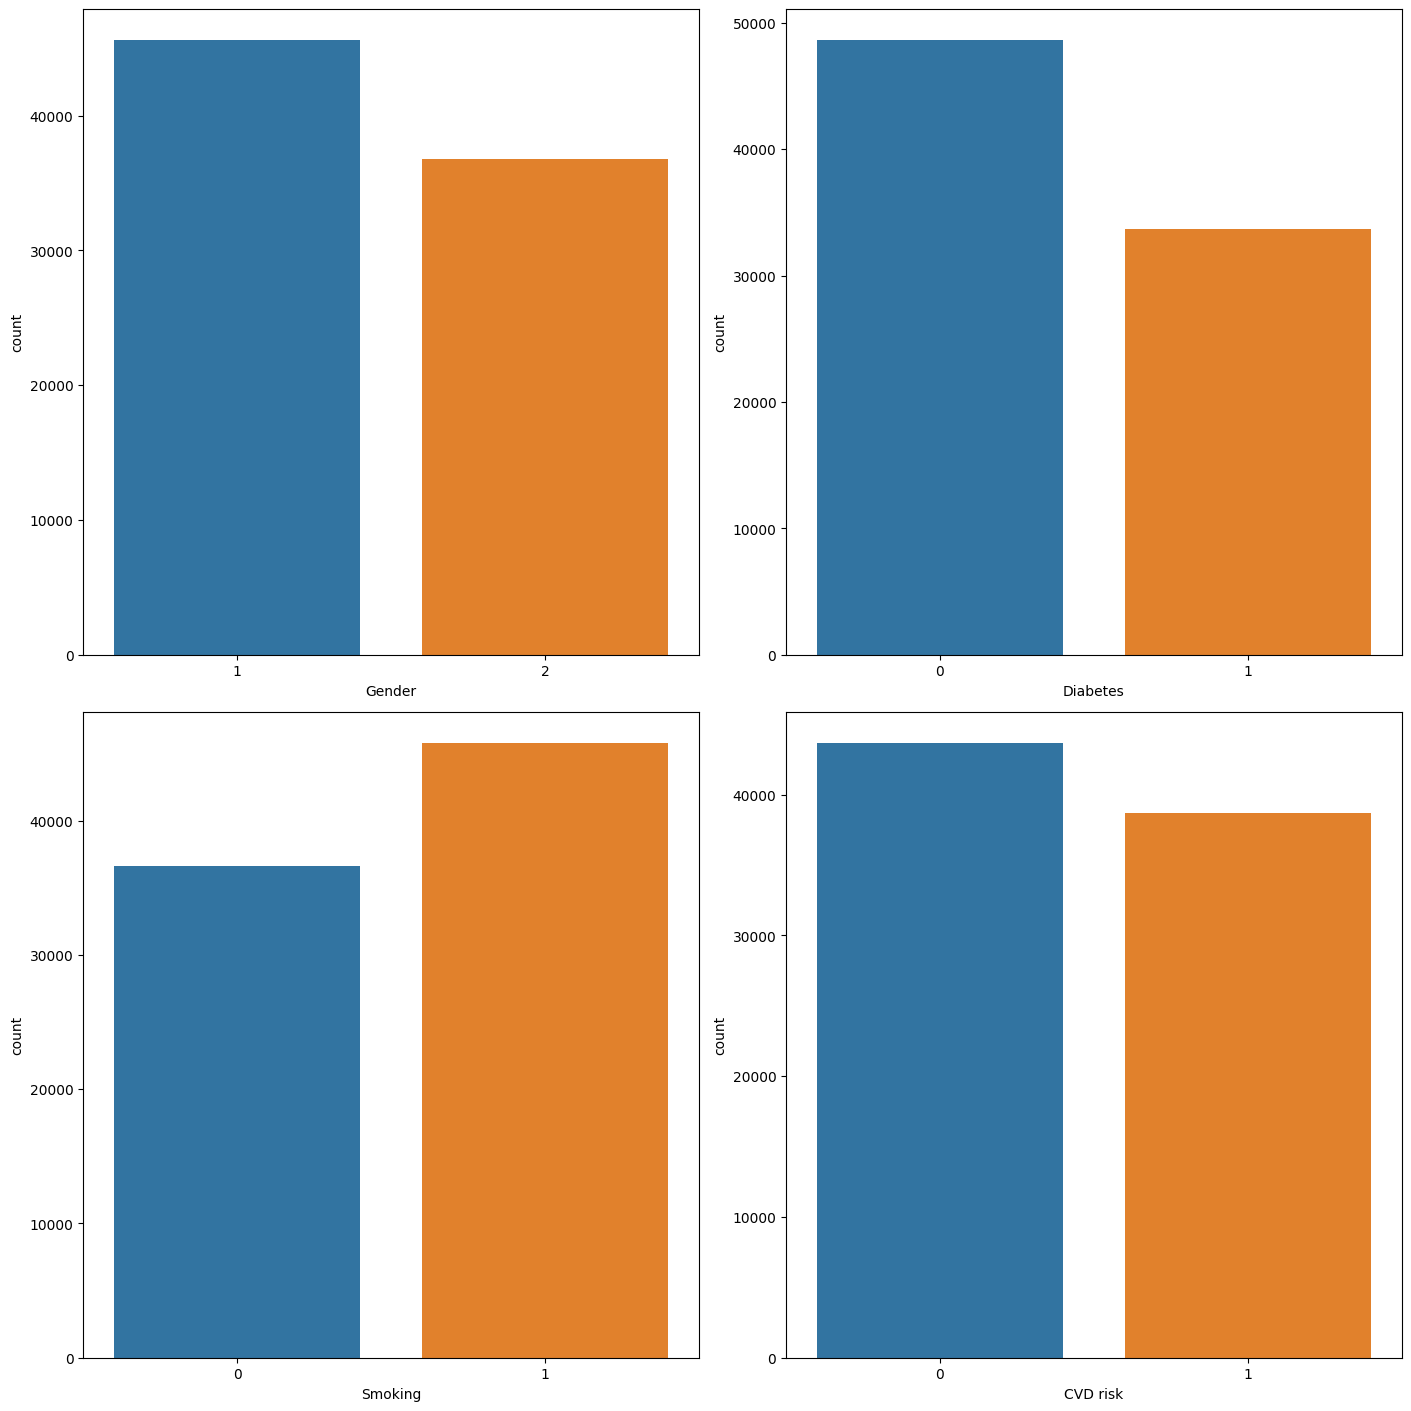

In [6]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots //total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=office_df, ax=axs[row][pos])

* All categorical features:`Gender`, `Smoking`, `Diabetes` and `CVD risk` are showing good class balance.

#### Numerical Features

In [7]:
numeric_features = ['Age', 'SysBP']

In [8]:
# Checking the brief statistical properities of the numerical variables in the dataset

office_df[numeric_features].describe()

,Age,SysBP
count,82377.000000,82377.000000
mean,58.011668,141.937319
std,10.947233,32.706830
min,29.600000,60.000000
25%,49.000000,119.000000
50%,57.000000,140.000000
75%,66.000000,163.000000
max,116.000000,243.000000


#### Observations

- Age has normal range between `29.6` to `116` years, with mean of `58` years, median of `57` years and IQR between `49` and `66` years. 
- Systolic blood pressure "SysBP" has normal range between `60` to `243` mmHg, with mean of `142` mmHg, median of `140` mmHg and IQR between `119` and `163` mmHg. 

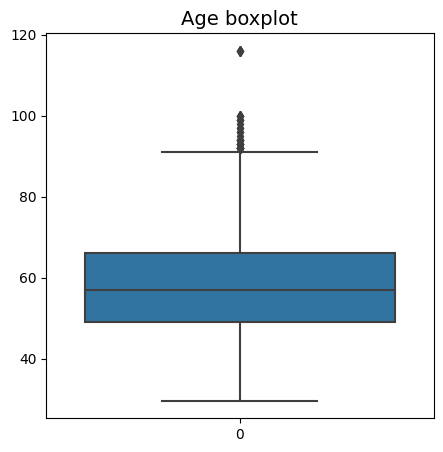

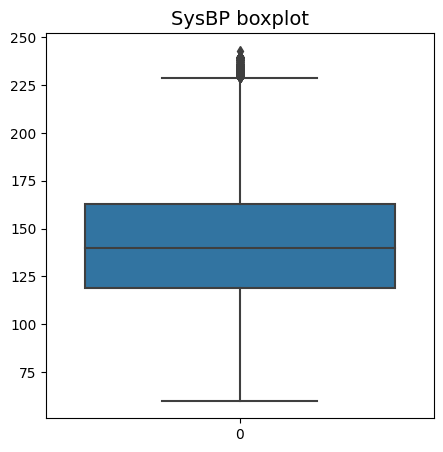

In [9]:
# Plotting the numerical variables in  the dataset
for feature in numeric_features:
    plt.figure(figsize=(5,5), facecolor='w')
    sns.boxplot(data=office_df[feature])
    plt.title(f'{feature} boxplot', fontsize=14)
    plt.show()

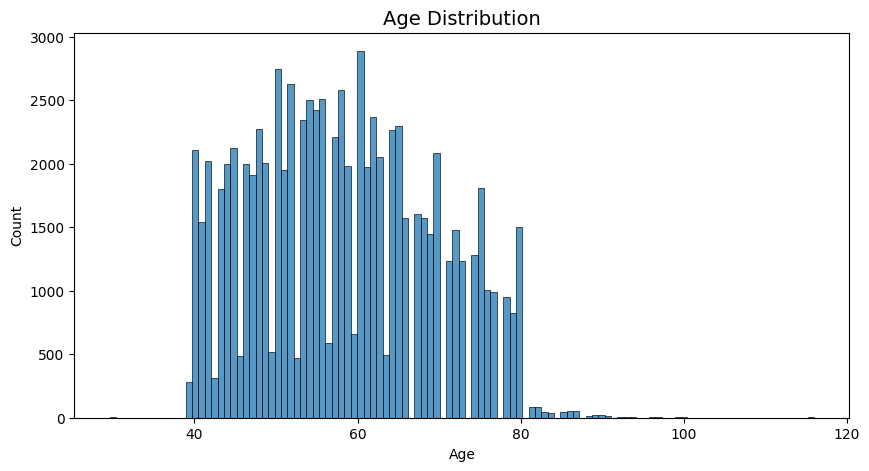

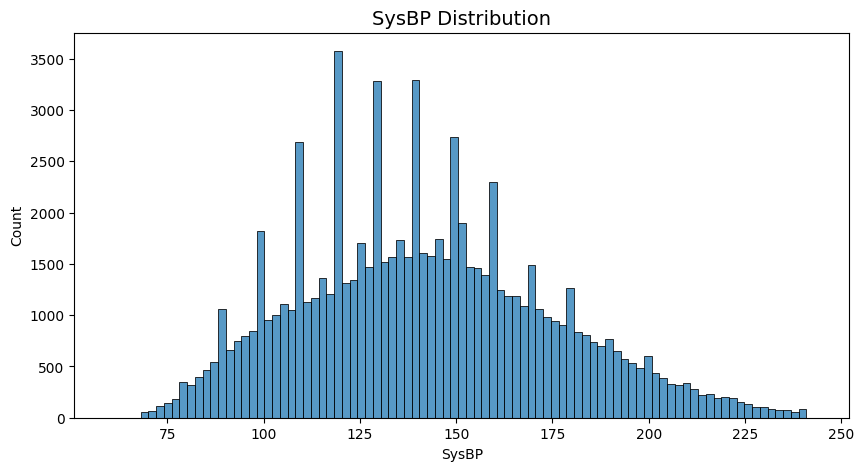

In [10]:
# plotting the distribution of numerical variables
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(office_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- Age distribution has almost even distribution.
- Systolic blood pressure "SysBP" distribution has almost normal distribution with some spikes.

#### Label variable

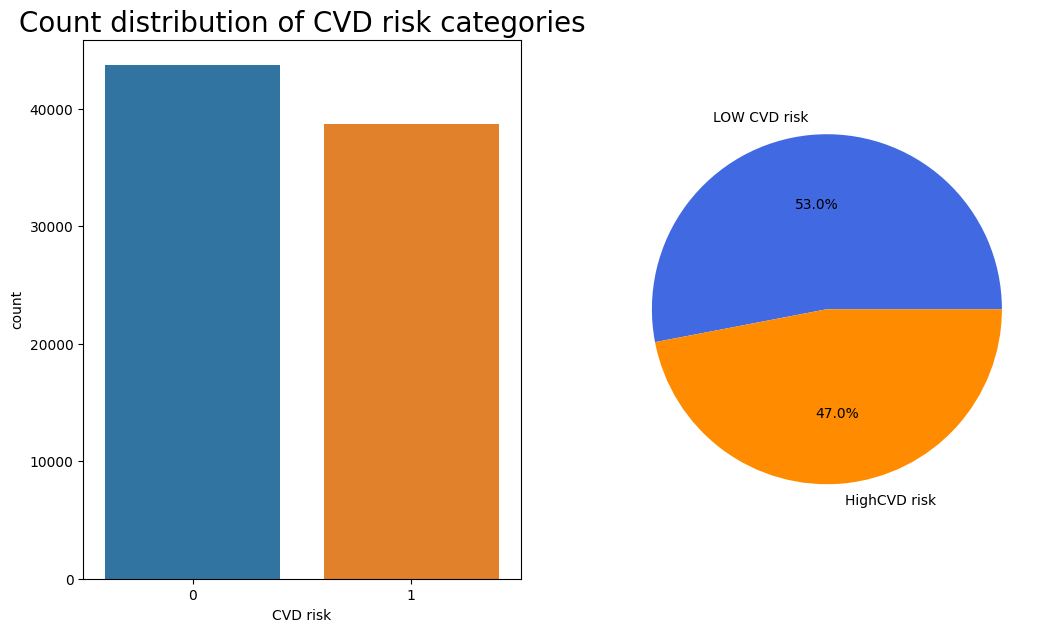

In [11]:
#Distribution of label variable,'CVD risk'

plt.figure(figsize=(7, 7), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="CVD risk", data=office_df)
plt.title("Count distribution of CVD risk categories", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(office_df["CVD risk"].value_counts(),autopct="%1.1f%%",labels=['LOW CVD risk', 'HighCVD risk'],
        colors=["royalblue", "darkorange"])
plt.show()

#### Observations

- `CVD risk` the label variable shows fair class balance.

### 2. Bivariate Analysis

#### Relation between Gender and risk of CVD

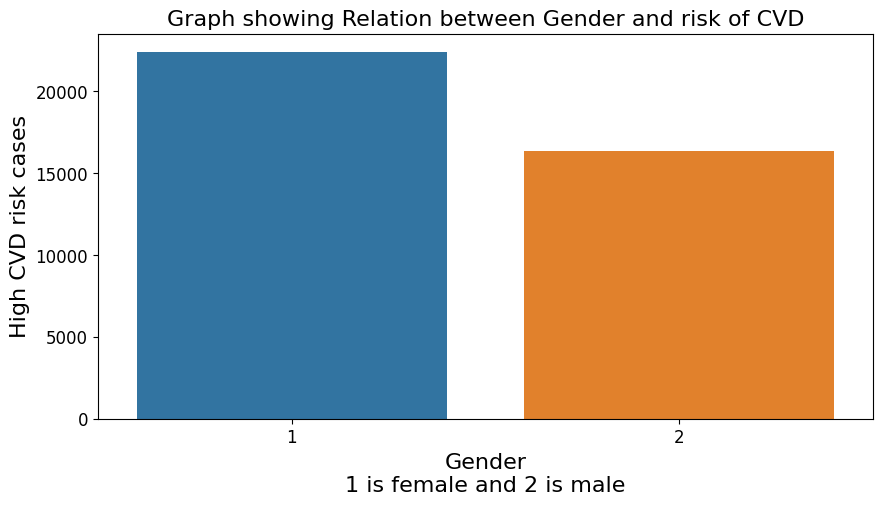

In [12]:
#checking for which gender has more risk of CVD
graph_1 = office_df.groupby("Gender", as_index=False)
graph_1 = graph_1['CVD risk'].sum()

#Ploting the above values
plt.figure(figsize=(10,5), facecolor='w')
sns.barplot(x=graph_1["Gender"], y=graph_1["CVD risk"])
plt.title("Graph showing Relation between Gender and risk of CVD", size=16)
plt.xlabel("Gender\n1 is female and 2 is male",size=16)
plt.ylabel("High CVD risk cases", size=16)
plt.xticks(size=12);
plt.yticks(size=12);

According to this graph, `Females` have shown a higher risk of cardiovascular disease `CVD risk`.

#### Relation between Smoking and risk of CVD

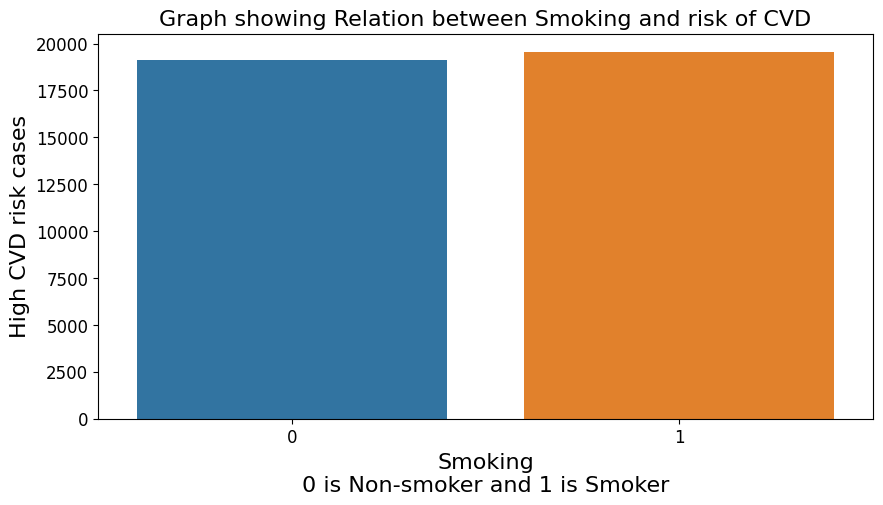

In [13]:
#checking for which gender has more risk of CVD
graph_2 = office_df.groupby("Smoking", as_index=False)
graph_2 = graph_2['CVD risk'].sum()

#Ploting the above values
plt.figure(figsize=(10,5), facecolor='w')
sns.barplot(x=graph_2["Smoking"], y=graph_2["CVD risk"])
plt.title("Graph showing Relation between Smoking and risk of CVD", size=16)
plt.xlabel("Smoking\n0 is Non-smoker and 1 is Smoker",size=16)
plt.ylabel("High CVD risk cases", size=16)
plt.xticks(size=12);
plt.yticks(size=12);

According to this graph, `Smokers` have shown a slighly higher risk of cardiovascular disease `CVD risk`.

#### Relation between Diabetes and risk of CVD

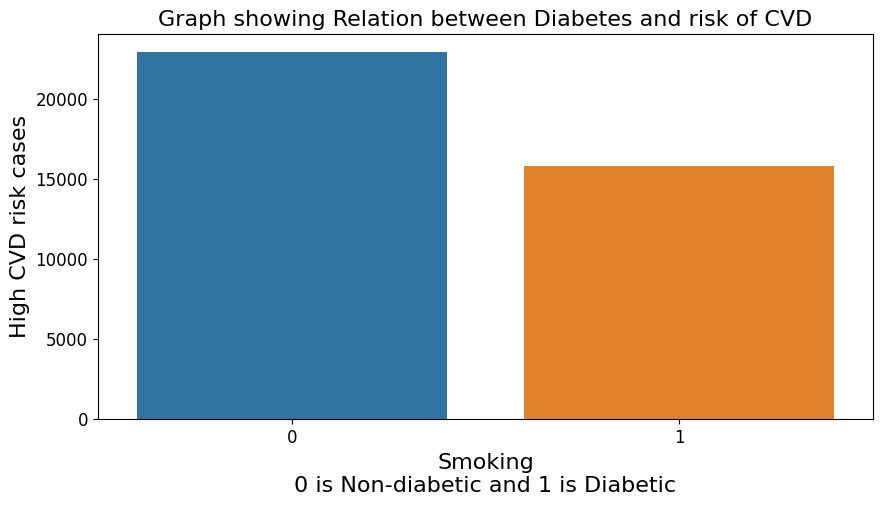

In [14]:
#checking for which Diabetes has more risk of CVD
graph_3 = office_df.groupby("Diabetes", as_index=False)
graph_3 = graph_3['CVD risk'].sum()

#Ploting the above values
plt.figure(figsize=(10,5), facecolor='w')
sns.barplot(x=graph_3["Diabetes"], y=graph_3["CVD risk"])
plt.title("Graph showing Relation between Diabetes and risk of CVD", size=16)
plt.xlabel("Smoking\n0 is Non-diabetic and 1 is Diabetic",size=16)
plt.ylabel("High CVD risk cases", size=16)
plt.xticks(size=12);
plt.yticks(size=12);

According to this graph,Unlikely `Non-diabetic` have shown a higher risk of cardiovascular disease `CVD risk`.

#### Relation between Systolic blood pressure and risk of CVD

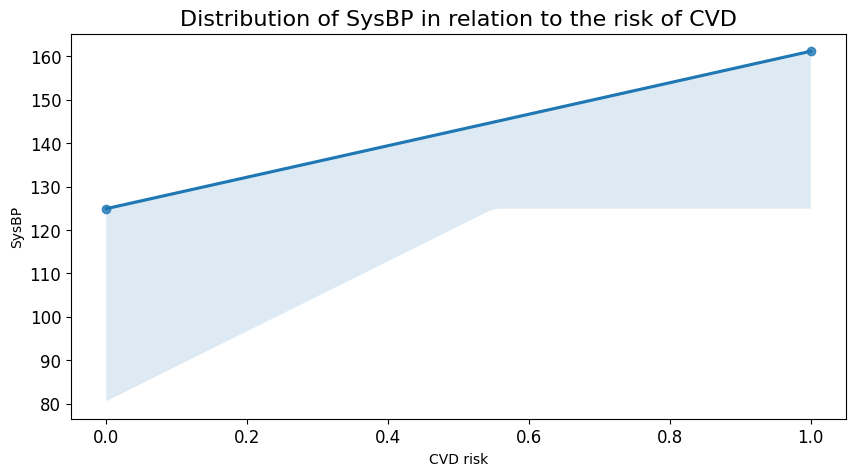

In [15]:
# Grouping and plotting of the data

graph_4 = office_df.groupby("CVD risk", as_index=False).SysBP.mean()

plt.figure(figsize=(10,5), facecolor='w')
sns.regplot(x=graph_4["CVD risk"], y=graph_4["SysBP"])
plt.title("Distribution of SysBP in relation to the risk of CVD", size=16)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows a positive relation of higher `CVD risk` with higher `SysBP`

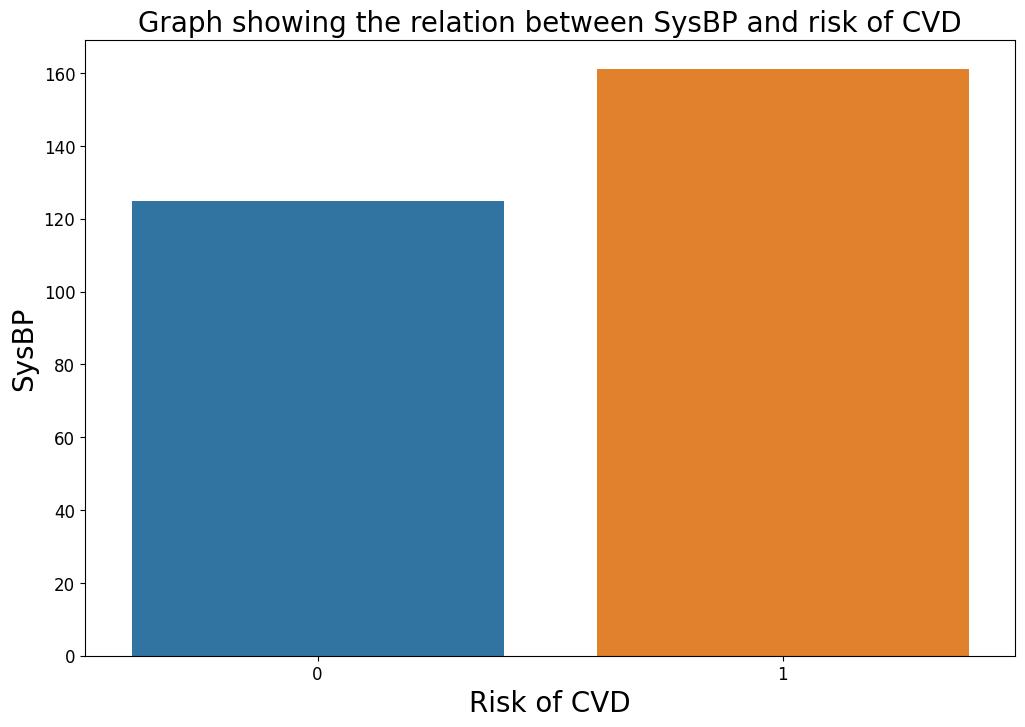

In [16]:
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_4["CVD risk"], y=graph_4["SysBP"])
plt.title("Graph showing the relation between SysBP and risk of CVD", size=20)
plt.xlabel("Risk of CVD", size=20)
plt.ylabel("SysBP", size=20)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows that high `CVD risk` group has mean systolic blood pressure of about `160` mmHg.
* while, low `CVD risk` group has mean systolic blood pressure of about `120` mmHg.

#### Relation between Age and risk of CVD

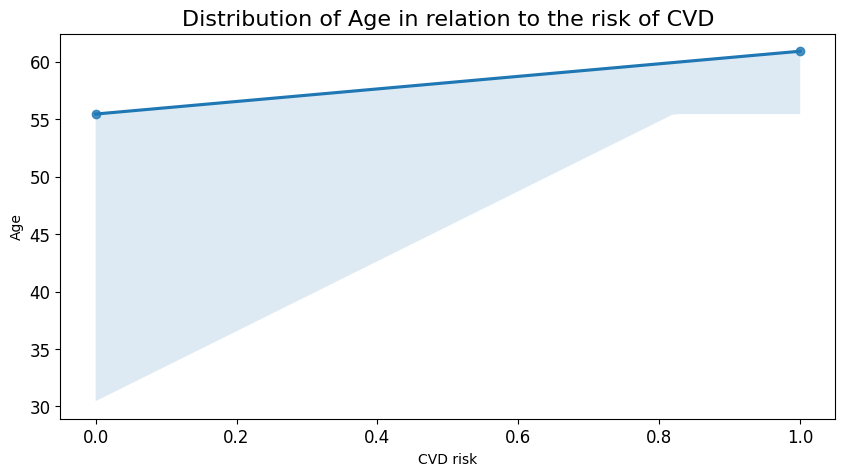

In [17]:
graph_5 = office_df.groupby("CVD risk", as_index=False).Age.mean()

plt.figure(figsize=(10,5), facecolor='w')
sns.regplot(x=graph_5["CVD risk"], y=graph_5["Age"])
plt.title("Distribution of Age in relation to the risk of CVD", size=16)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows a minor relation of higher `CVD risk` with older `Age`

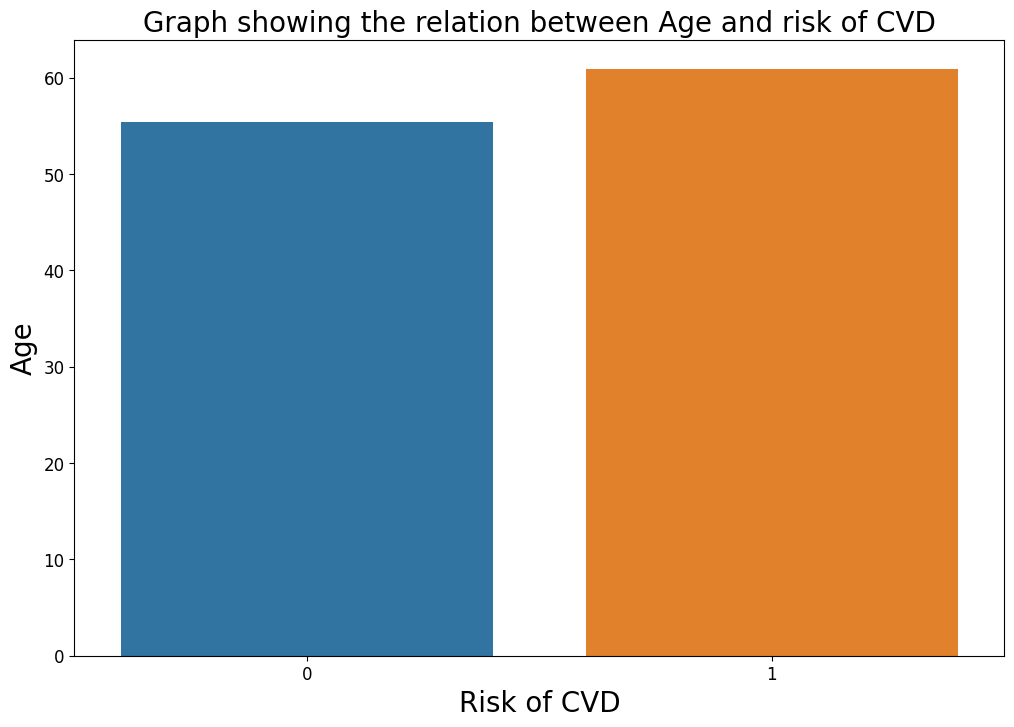

In [18]:
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_5["CVD risk"], y=graph_5["Age"])
plt.title("Graph showing the relation between Age and risk of CVD", size=20)
plt.xlabel("Risk of CVD", size=20)
plt.ylabel("Age", size=20)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows that high `CVD risk` group has mean Age of about `60` years.
* while, low `CVD risk` group has mean Age of about `55` years.

#### Relation of Systolic Blood pressure with every age group

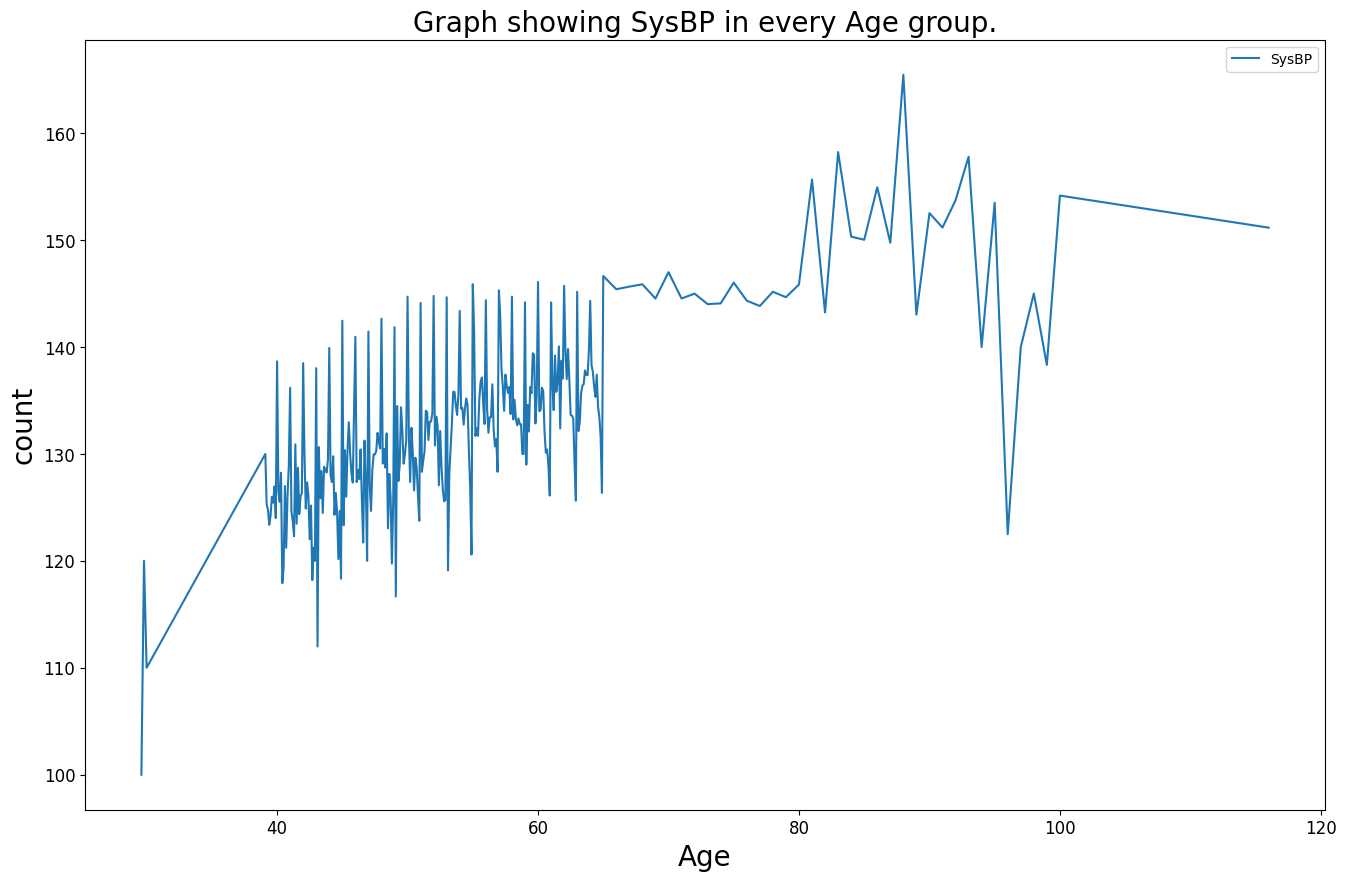

In [19]:
graph_6 = office_df.groupby("Age").SysBP.mean()
plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_6, label="SysBP")
plt.title("Graph showing SysBP in every Age group.", size=20)
plt.xlabel("Age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows that the Systolic Blood pressure tend to increase with age with alot of fluctuation.

### Correlation Heat Map

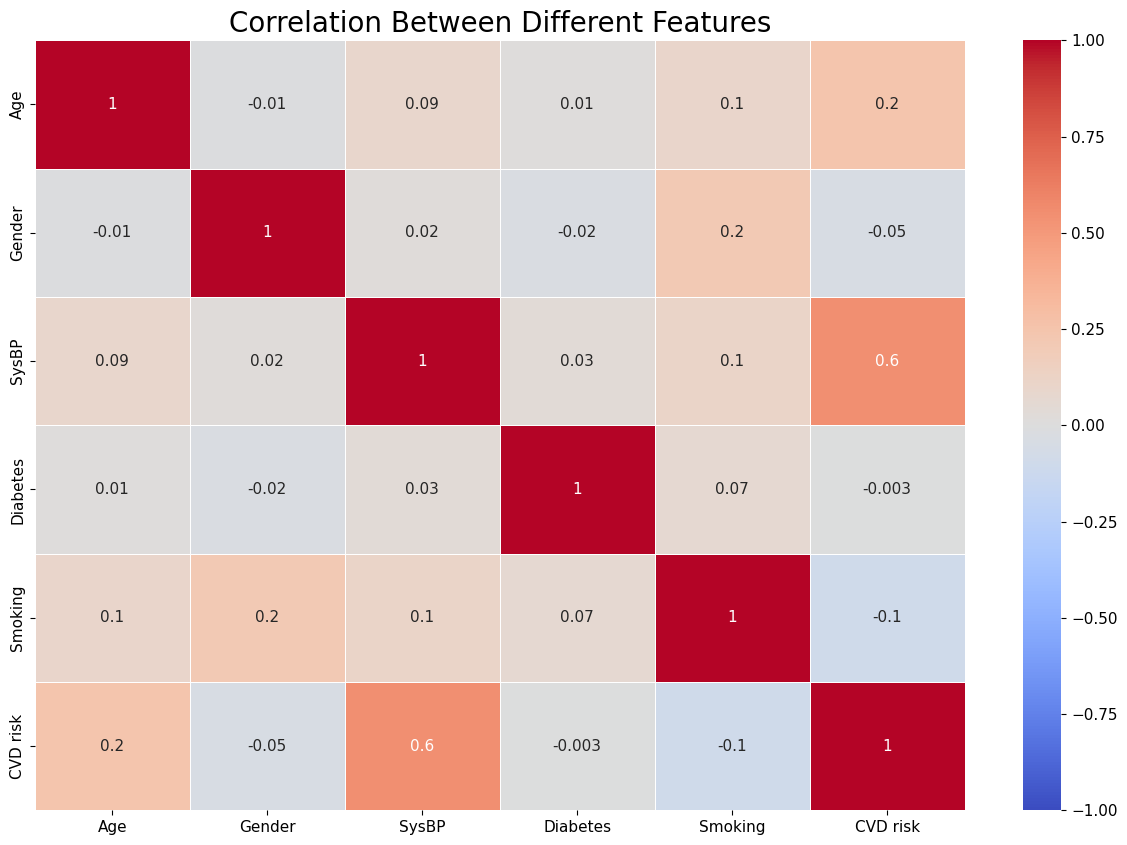

In [20]:
#plotting correlation heat map
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(office_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, fmt='.1g', linewidths=.5);
plt.title('Correlation Between Different Features', fontsize = 20)
plt.show();

#### Observations
* Age has a significant impact, but not very high correlated with target CVD risk.
* However, Systolic Blood pressure is the most highly correlated feature with target CVD risk.

## Feature Selection

In [21]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=office_df.iloc[:,0:5]
y=office_df.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (82377, 5) 
y -  (82377,)


In [22]:
#Apply SelectKBest and extract top 3 features
best=SelectKBest(score_func=chi2, k=3)

In [23]:
fit=best.fit(X,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [24]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(3,'Score'))

   Feature          Score
2    SysBP  189952.569384
0      Age   10572.032755
4  Smoking     334.043860


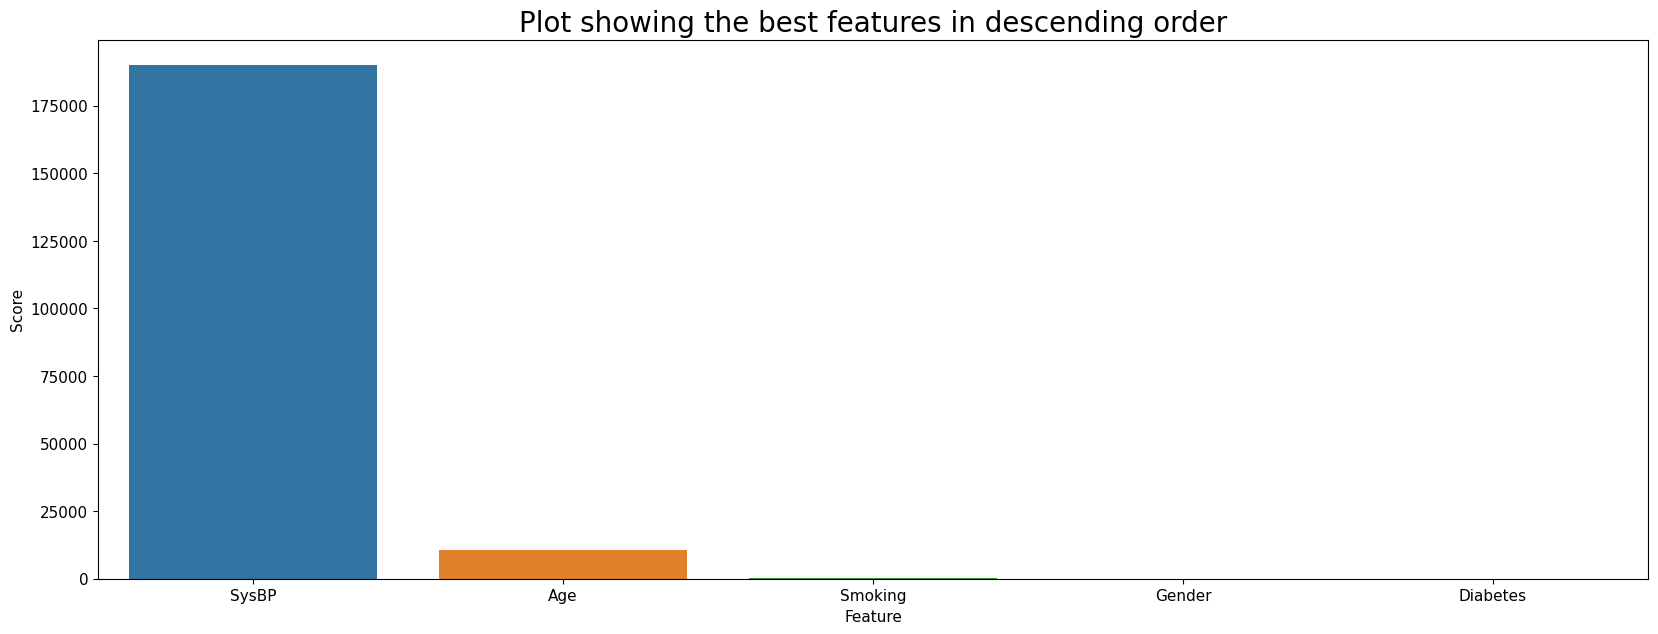

In [25]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores)
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

* This plot shows the `Features` and their respective `chi-square test` scores.
* Only Systolic blood pressure followed by age have strongest influence over the target CVD risk.

#### *Predictive AI modelling will be applied in the next notebook*